# Capstone Project: Biodiversity in National Parks


## Introduction

I am a biodiversity analyst working for the National Parks Service. I am going to help them analyze some data about various species at four national parks.

- Bryce National Park
- Great Smoky Mountains National Park
- Yellowstone National Park
- Yosemite National Park

The datasets provided are species_info.csv and observations.csv.


## A Description of the Data in Species_info.csv



In [1]:
# Import the modules to be used in this analysis
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv')

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
print(species.shape)

(5824, 4)


We observe that the species dataset has 5824 rows in 4 columns.

Let's answer the folowing questions about the species dataset:
- How many different species are in the species DataFrame?
- What are the different values of category in species?
- What are the different values of conservation_status?


In [6]:
species.scientific_name.nunique()

5541

In [7]:
category_names = species.category.unique()
print(category_names)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
conservation_status_names = species.conservation_status.unique()
print(conservation_status_names)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
chart_feed = pd.crosstab(species.category, species.conservation_status)
chart_feed

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


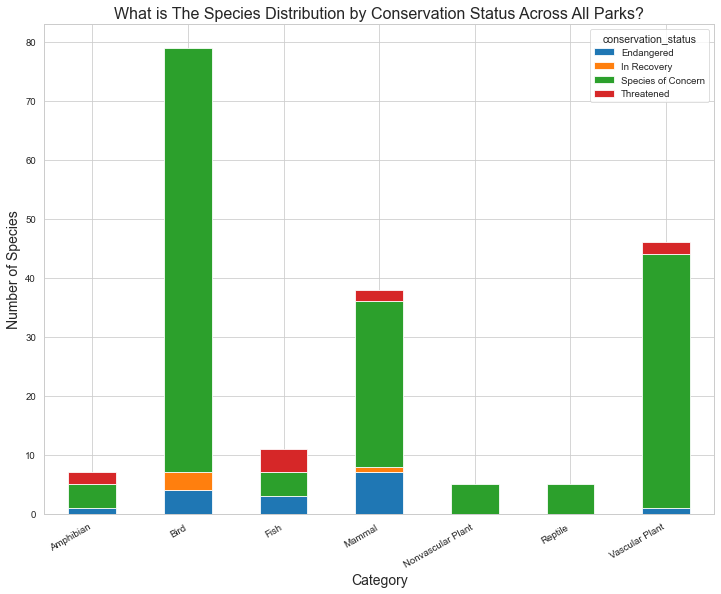

In [10]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.1)
barplot = chart_feed.plot(kind = 'bar', figsize=(12,9), stacked=True)
barplot.set_xlabel('Category', fontsize=14)
barplot.set_ylabel('Number of Species', fontsize=14)
barplot.set_title('What is The Species Distribution by Conservation Status Across All Parks?', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.savefig('What is The Species Distribution by Conservation Status Across All Parks.png', dpi=300, bbox_inches='tight')
plt.show()



### Observations:
- Birds are vastly the more represented species of those considered protected species.  
- Birds have the most species in the  'Species of Concern' conservation_status. Followed by 'Vascular Plants'.
- Birds are the species most likely to be 'In Recovery'.
- Mammals have the most species that are 'Endangered'.
- Fish are the species most likely to be 'Threatened'.
- All categories of species have a high amount of 'Species of Concern'.  In fact, it is the number one or two most likely conservation_status for a given category of species.  In the case of the 'Nonvascular Plant' and the 'Reptile' categories, it is the only conservation_status for those species.

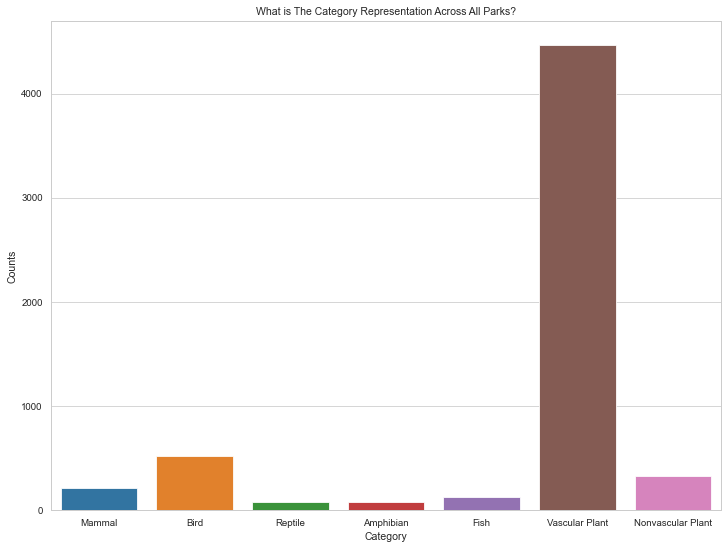

In [11]:
plt.figure(figsize = (12,9))
sns.countplot(x = 'category', data= species)
plt.title('What is The Category Representation Across All Parks?')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.savefig('What is The Category Representation Across All Parks.png', dpi=300, bbox_inches='tight')
plt.show()

### Observation: 'Vascular Plant' is the most represented species in the dataset.

The column conservation_status has several possible values:

- Species of Concern: declining or appear to be in need of conservation
- Threatened: vulnerable to endangerment in the near future
- Endangered: seriously at risk of extinction
- In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.

In [12]:
species.groupby(['conservation_status'])['scientific_name'].count().reset_index()

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


As we saw before, there are far more than 200 species in the species table. Clearly, only a small number of them are categorized as needing some sort of protection. The rest have conservation_status equal to None. Because groupby does not include None, we will need to fill in the null values. We can do this using .fillna. We pass in however we want to fill in our None values as an argument.

In [13]:
species.fillna('No Intervention', inplace=True)

In [14]:
species.groupby(['conservation_status'])['scientific_name'].count().reset_index()

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


In [15]:
no_intervention_percentage = 5633 / 5824 * 100
no_intervention_percentage

96.72046703296702

### Observation: 'No Intervention' is the most represented conservation_status in the dataset.   96.72% of the species in the dataset are not protected.

In [16]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


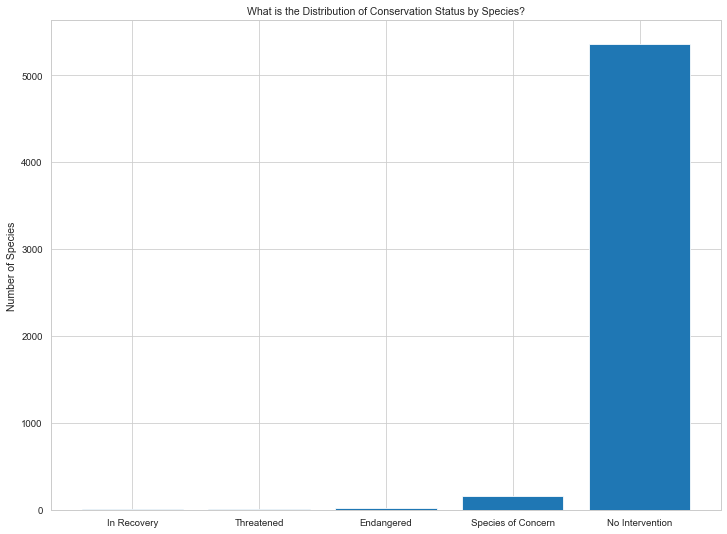

In [17]:
plt.figure(figsize=(12, 9))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('What is the Distribution of Conservation Status by Species?')
plt.savefig('What is the Distribution of Conservation Status by Species.png', dpi=300, bbox_inches='tight')
plt.show()

Are certain types of species more likely to be endangered?

In [18]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [19]:
category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].count().reset_index()
category_counts

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116
5,Fish,True,11
6,Mammal,False,176
7,Mammal,True,38
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [20]:
category_pivot = category_counts.pivot(values='scientific_name', index='category', columns='is_protected').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [21]:
category_pivot.columns = ['category', 'not_protected', 'protected']
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected )
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,73,7,0.087500
1,Bird,442,79,0.151631
2,Fish,116,11,0.086614
3,Mammal,176,38,0.177570
4,Nonvascular Plant,328,5,0.015015
5,Reptile,74,5,0.063291
6,Vascular Plant,4424,46,0.010291


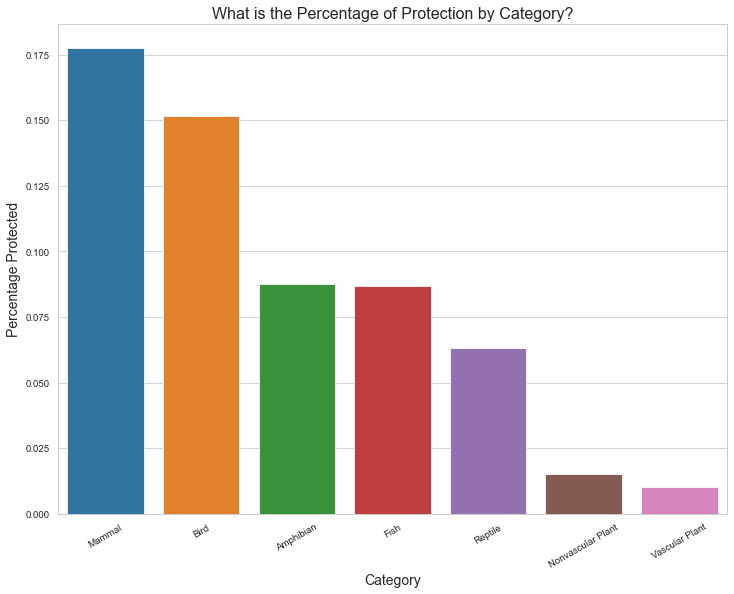

In [22]:
plt.figure(figsize=(12, 9))
percentage_plot = sns.barplot(y='percent_protected', x='category', data=category_pivot, order=category_pivot.sort_values('percent_protected', ascending=False).category)
percentage_plot.set_title('What is the Percentage of Protection by Category?', fontsize=16)
percentage_plot.set_xticklabels(percentage_plot.get_xticklabels(),rotation=30)
percentage_plot.set_ylabel('Percentage Protected', fontsize=14)
percentage_plot.set_xlabel('Category', fontsize=14)
plt.savefig('What is the Percentage of Protection by Category.png', dpi=300, bbox_inches='tight')
plt.show()

It looks like species in category 'Mammal' are more likely to be protected than species in 'Bird'. We're going to do a significance test to see if this statement is true. Before you do the significance test, consider the following questions:

- Is the data numerical or categorical?
- How many pieces of data is being compared?

The data is categorical and there are two pieces of data to test. I would recommend the chi squared test.

In [23]:
contingency = [[38, 176],
               [79, 442]]
contingency

[[38, 176], [79, 442]]

In [24]:
#chi2_contingency(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency)
pval

0.445901703047197

### Observation: It looks like this difference isn't significant!

Let's test another. Is the difference between Reptile and Mammal significant?

In [25]:
contingency = [[38, 176],
               [5, 74]]
chi2, pval, dof, expected = chi2_contingency(contingency)
pval

0.02338465214871547

### Observation: Yes! It looks like there is a significant difference between Reptile and Mammal!

Conservationists have been recording sightings of different species at several national parks for the past 7 days. They've saved their observations in a file called observations.csv. 

## A Description of the Data in Observations.csv

In [26]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [27]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [28]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [29]:
observations.shape

(23296, 3)

In [30]:
observations_min = observations.observations.min()
print('observations_min ', observations_min)
observations_max = observations.observations.max()
print('observations_max ', observations_max)
observations_total = observations.observations.sum()
print('observations_total ', observations_total)
observations_unique_species = observations.scientific_name.nunique()
print('observations_unique_species ', observations_unique_species)

observations_min  9
observations_max  321
observations_total  3314739
observations_unique_species  5541


Some scientists are studying the number of sheep sightings at different national parks. There are several different scientific names for different types of sheep. We'd like to know which rows of species are referring to sheep. 

## Analyze Observations of Sheep in Datasets

In [31]:
species['is_sheep'] =  species.common_names.apply(lambda x: 'Sheep' in x)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [32]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


### Observation: Many of the results are actually plants. 

In [33]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [34]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


How many total sheep observations (across all three species) were made at each national park? 

In [35]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


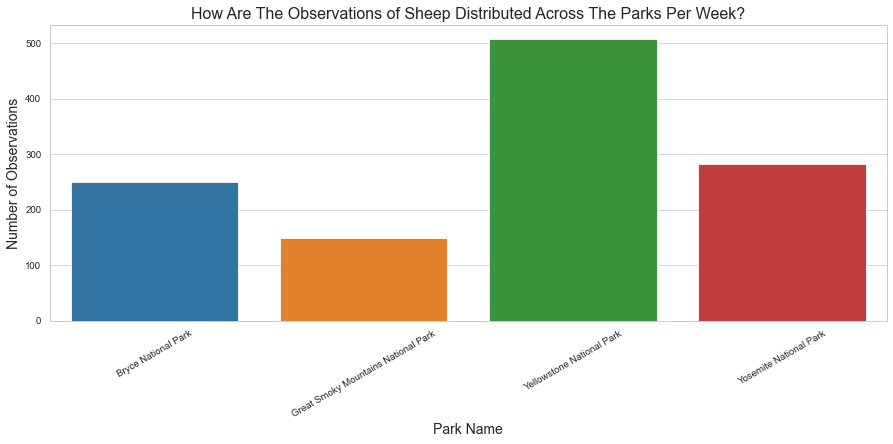

In [36]:
plt.figure(figsize = (15,25))
plt.subplot(4,1,4)
observations_plot = sns.barplot(x = 'park_name' , y = 'observations', data= obs_by_park)
observations_plot.set_title('How Are The Observations of Sheep Distributed Across The Parks Per Week?', fontsize=16)
observations_plot.set_xticklabels(observations_plot.get_xticklabels(),rotation=30)
observations_plot.set_ylabel('Number of Observations', fontsize=14)
observations_plot.set_xlabel('Park Name', fontsize=14)
plt.savefig('How Are The Observations of Sheep Distributed Across The Parks Per Week.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
protected_obs_by_park = sheep_observations.groupby(['park_name','conservation_status']).observations.sum().reset_index()
protected_obs_by_park

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,22
1,Bryce National Park,No Intervention,119
2,Bryce National Park,Species of Concern,109
3,Great Smoky Mountains National Park,Endangered,25
4,Great Smoky Mountains National Park,No Intervention,76
5,Great Smoky Mountains National Park,Species of Concern,48
6,Yellowstone National Park,Endangered,67
7,Yellowstone National Park,No Intervention,221
8,Yellowstone National Park,Species of Concern,219
9,Yosemite National Park,Endangered,39


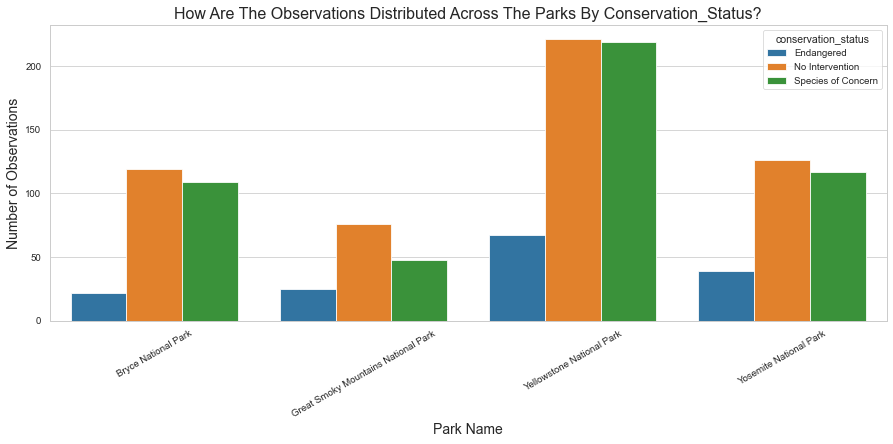

In [38]:
plt.figure(figsize = (15,25))
plt.subplot(4,1,4)
observations_plot = sns.barplot(x = 'park_name' , y = 'observations', hue='conservation_status', data= protected_obs_by_park)
observations_plot.set_title('How Are The Observations Distributed Across The Parks By Conservation_Status?', fontsize=16)
observations_plot.set_xticklabels(observations_plot.get_xticklabels(),rotation=30)
observations_plot.set_ylabel('Number of Observations', fontsize=14)
observations_plot.set_xlabel('Park Name', fontsize=14)
plt.savefig('How Are The Observations Distributed Across The Parks By Conservation_Status.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations: Most of the sheep observed did not have protected status.  Most of the protected sheep are 'Species of Concern'.  The balance of the protected sheep are 'Endangered'.   Yellowstone National Park has the most observations of sheep and the highest number of protected sheep.

## Prepare to Analyze Effectiveness of Hoof and Mouth Disease Reduction Program

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage point. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the Codecademy sample size calculator to calculate the number of sheep that they would need to observe from each park. Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [39]:
minimum_detectable_effect = 100 * 0.05 / 0.15

baseline = 15 
sample_size = 870
minimum_detectable_effect

33.333333333333336

How many weeks would be needed to observe sheep at Bryce National Park in order to observe enough sheep? How many weeks would be needed to observe at Yellowstone National Park to observe enough sheep?

In [40]:
weeks_to_observe_bryce = sample_size / 250
weeks_to_observe_yellowstone = sample_size / 507

print("weeks_to_observe_bryce = {:.2f}".format( weeks_to_observe_bryce ))
print("weeks_to_observe_yellowstone = {:.2f}".format( weeks_to_observe_yellowstone ))

weeks_to_observe_bryce = 3.48
weeks_to_observe_yellowstone = 1.72


Bryce National Park will take about 3.48 weeks and Yellowstone National Park roughly 1.72 weeks to observe enough sheep.